In [1]:
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
tokenizer = RegexpTokenizer(r'\w+')

In [3]:
def process_line(line,words_dict):
    tokens = tokenizer.tokenize(line)
    for token in tokens:
        if not token in words_dict:
            words_dict[token] = 1
        else:
            words_dict[token] +=1

In [4]:
words_dict = {}

with open('mobydick.txt','r') as fd:
    for line in fd.readlines():
        process_line(line,words_dict)

In [16]:
values = np.array(sorted(list(words_dict.values()),reverse=True))
m = len(values)
index = np.array(range(m))+1
px.scatter(x = index,y = values,log_x=True,log_y=True)


In [39]:
ccpd = []
values  = np.array(values)
dim = len(values)
for x in index:
    c = len(values[values>=x])/dim
    ccpd.append(c)

px.scatter(x=index,y=ccpd,log_x=True,log_y=True,title='CCPD')


In [25]:
probs = []
total = len(index)
for x in index:
    probs.append(len(values[values==x]))
px.scatter(x=index,y=probs,log_x=True,log_y=True)

/var/folders/tx/5_6_zg1d0fd4zjwzxg1ztrth0000gn/T/ipykernel_9104/3863296644.py:6: RuntimeWarning:

divide by zero encountered in log

/var/folders/tx/5_6_zg1d0fd4zjwzxg1ztrth0000gn/T/ipykernel_9104/3863296644.py:9: RuntimeWarning:

divide by zero encountered in log



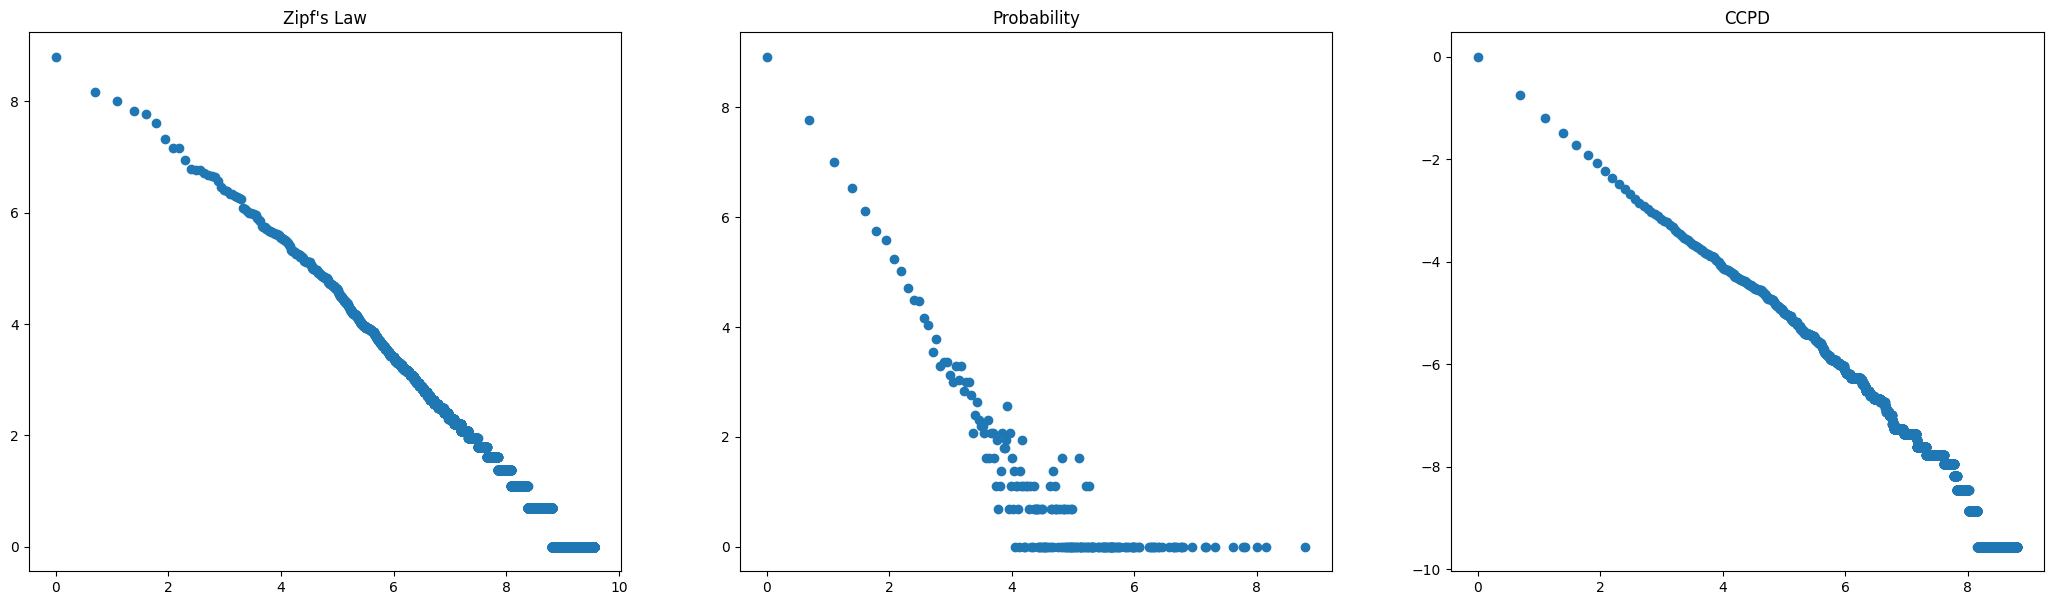

In [49]:
plt.figure(figsize=(26,7))
plt.subplot(1,3,1)
plt.scatter(np.log(index),np.log(values))
plt.title('Zipf\'s Law')
plt.subplot(1,3,3)
plt.scatter(np.log(index),np.log(ccpd))
plt.title('CCPD')
plt.subplot(1,3,2)
plt.scatter(np.log(index),np.log(probs))
plt.title('Probability')
plt.show()
